In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install h5py==2.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for h5py
  Running setup.py clean for h5py
Failed to build h5py
ERROR: Could not build wheels for h5py, which is required to install pyproject.toml-based projects


In [ ]:
import tensorflow as tf
print("tensorflow version :{}".format(tf.__version__))
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tensorflow version :2.15.0
Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16806585965376786608
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7725526914763520867
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
#### physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import class_weight

In [ ]:

from keras.layers import Conv2D, Dense, Dropout, GlobalMaxPooling2D, Reshape
from keras.layers import TimeDistributed, LSTM, Bidirectional, Input, concatenate,RepeatVector
from keras import regularizers
# from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model, Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import plot_model, to_categorical
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from keras.regularizers import l1,l2


In [ ]:
data_path = '/content/drive/MyDrive/CAV/data/Constant attack/0_1_dur_10/'

In [ ]:
sensor1_data = pd.read_csv(data_path + "Sensor1_values_constant_0_1.csv", index_col= 'Unnamed: 0')
sensor1_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor1_data

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579
...,...,...,...
29795,23.238521,22.834129,0.879058
29796,23.238521,22.840796,-0.034917
29797,23.238521,22.826919,0.009582
29798,23.238521,22.827342,0.021096


In [ ]:
sensor1_label = pd.read_csv(data_path+"Ground_truth_constant_0_1_dur_10_sensor1.csv", names=['Class'])
sensor1_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor1_label

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
29795,1.0
29796,1.0
29797,1.0
29798,1.0


In [ ]:
len(sensor1_label)

29800

In [ ]:
print(min(sensor1_data['InVehicle_Longitudinal_Speed']))
print(max(sensor1_data['InVehicle_Longitudinal_Speed']))

2.8699999999999998e-98
27.34345466


In [ ]:
print(min(sensor1_data['GPS_Speed']))
print(max(sensor1_data['GPS_Speed']))

0.004172253
26.71574975


In [ ]:
print(min(sensor1_data['InVehicle_Longitudinal_Accel']))
print(max(sensor1_data['InVehicle_Longitudinal_Accel']))

-3.034234538
3.205895665


In [ ]:
sensor2_data = pd.read_csv(data_path + "Sensor2_values_constant_0_1.csv", index_col = "Unnamed: 0")
sensor2_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor2_label = pd.read_csv(data_path + "Ground_truth_constant_0_1_dur_10_sensor2.csv",names=['Class'])
sensor2_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
print(min(sensor2_data['InVehicle_Longitudinal_Speed']))
print(max(sensor2_data['InVehicle_Longitudinal_Speed']))

2.8699999999999998e-98
27.34345466


In [ ]:
print(min(sensor2_data['GPS_Speed']))
print(max(sensor2_data['GPS_Speed']))

0.004172253
26.71574975


In [ ]:
print(min(sensor2_data['InVehicle_Longitudinal_Accel']))
print(max(sensor2_data['InVehicle_Longitudinal_Accel']))

-3.034234538
3.205895665


In [ ]:
sensor3_data = pd.read_csv(data_path + "Sensor3_values_constant_0_1.csv", index_col = "Unnamed: 0")
sensor3_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor3_label = pd.read_csv(data_path + "Ground_truth_constant_0_1_dur_10_sensor3.csv", names=['Class'])
sensor3_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
print(min(sensor3_data['InVehicle_Longitudinal_Speed']))
print(max(sensor3_data['InVehicle_Longitudinal_Speed']))

2.8699999999999998e-98
27.34345466


In [ ]:
print(min(sensor2_data['GPS_Speed']))
print(max(sensor2_data['GPS_Speed']))

0.004172253
26.71574975


In [ ]:
print(min(sensor2_data['InVehicle_Longitudinal_Accel']))
print(max(sensor2_data['InVehicle_Longitudinal_Accel']))

-3.034234538
3.205895665


In [ ]:
scaler = StandardScaler()
scaler.fit(sensor1_data)
sensor1_data_normal = scaler.transform(sensor1_data)
sensor1_data_normal[:5]

array([[-0.44765537, -0.47260849, -0.2425745 ],
       [-0.4487709 , -0.47956425, -0.58638474],
       [-0.44935978, -0.48049585, -0.22608171],
       [-0.44985304, -0.478569  , -0.16101518],
       [-0.4501113 , -0.47760572, -0.15294373]])

In [ ]:
sensor1_data_normal

array([[-0.44765537, -0.47260849, -0.2425745 ],
       [-0.4487709 , -0.47956425, -0.58638474],
       [-0.44935978, -0.48049585, -0.22608171],
       ...,
       [ 1.1484267 ,  1.09444845, -0.08833019],
       [ 1.1484267 ,  1.09450602, -0.07255615],
       [ 1.1484267 ,  1.08973229, -0.06104357]])

In [ ]:
len(sensor1_data_normal)

29800

In [ ]:
scaler = StandardScaler()
scaler.fit(sensor2_data)
sensor2_data_normal = scaler.transform(sensor2_data)
sensor2_data_normal[:5]

array([[-0.44765537, -0.47260849, -0.2425745 ],
       [-0.4487709 , -0.47956425, -0.58638474],
       [-0.44935978, -0.48049585, -0.22608171],
       [-0.44985304, -0.478569  , -0.16101518],
       [-0.4501113 , -0.47760572, -0.15294373]])

In [ ]:
scaler = StandardScaler()
scaler.fit(sensor3_data)
sensor3_data_normal = scaler.transform(sensor3_data) #
sensor3_data_normal[:5]

array([[-0.44765537, -0.47260849, -0.2425745 ],
       [-0.4487709 , -0.47956425, -0.58638474],
       [-0.44935978, -0.48049585, -0.22608171],
       [-0.44985304, -0.478569  , -0.16101518],
       [-0.4501113 , -0.47760572, -0.15294373]])

In [ ]:
window_size = 10

# create windows with overlap
def convertToFrames(X_data,y_data, step):
    X, Y =[], []
    for i in range(len(X_data)-step):
        y_or = 0
        d=i+step
        X.append(X_data[i:d,])
        for y in y_data.iloc[i:d].values:
           y_or = y_or or y

        Y.append(y_or)
    return np.array(X), np.array(Y)

In [ ]:
X_sensor1, y_sensor1 = convertToFrames(sensor1_data_normal, sensor1_label, window_size)
X_sensor1.shape, y_sensor1.shape
# print(X_sensor1[0])
# print(X_sensor1[1])

((29790, 10, 3), (29790, 1))

In [ ]:
X_sensor1

array([[[-0.44765537, -0.47260849, -0.2425745 ],
        [-0.4487709 , -0.47956425, -0.58638474],
        [-0.44935978, -0.48049585, -0.22608171],
        ...,
        [-0.45161774, -0.48124433,  1.1475451 ],
        [-0.45258111, -0.48313248,  1.1475451 ],
        [-0.45317347, -0.48382653,  1.1475451 ]],

       [[-0.4487709 , -0.47956425, -0.58638474],
        [-0.44935978, -0.48049585, -0.22608171],
        [-0.44985304, -0.478569  , -0.16101518],
        ...,
        [-0.45258111, -0.48313248,  1.1475451 ],
        [-0.45317347, -0.48382653,  1.1475451 ],
        [-0.45370422, -0.48395027,  1.1475451 ]],

       [[-0.44935978, -0.48049585, -0.22608171],
        [-0.44985304, -0.478569  , -0.16101518],
        [-0.4501113 , -0.47760572, -0.15294373],
        ...,
        [-0.45317347, -0.48382653,  1.1475451 ],
        [-0.45370422, -0.48395027,  1.1475451 ],
        [-0.454495  , -0.48245024,  1.1475451 ]],

       ...,

       [[ 1.09804975,  1.09647765,  1.1029012 ],
        [ 1

In [ ]:
len(X_sensor1)

29790

In [ ]:
X_sensor2, y_sensor2 = convertToFrames(sensor2_data_normal, sensor2_label, window_size)
X_sensor2.shape, y_sensor2.shape

((29790, 10, 3), (29790, 1))

In [ ]:
X_sensor3, y_sensor3 = convertToFrames(sensor3_data_normal, sensor3_label, window_size)
X_sensor3.shape, y_sensor3.shape

((29790, 10, 3), (29790, 1))

In [ ]:
y_sensor3

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
y_sensor1 = to_categorical(y_sensor1, num_classes= 2, dtype='float32')
y_sensor1

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y_sensor1.shape

(29790, 2)

In [ ]:
y_sensor2 = to_categorical(y_sensor2, num_classes= 2, dtype='float32')

In [ ]:
y_sensor3 = to_categorical(y_sensor3, num_classes= 2, dtype='float32')

In [ ]:
y_sensor1.shape, y_sensor2.shape, y_sensor3.shape

((29790, 2), (29790, 2), (29790, 2))

In [ ]:
y_sensor1 = [np.argmax(i) for i in y_sensor1]
y_sensor2 = [np.argmax(i) for i in y_sensor2]
y_sensor3 = [np.argmax(i) for i in y_sensor3]

In [ ]:
y_sensors = []
for i in range(len(y_sensor1)):
  y_sensors.append(y_sensor1[i] or y_sensor2[i] or y_sensor3[i])

In [ ]:
y_sensors = to_categorical(y_sensors, num_classes= 2, dtype='float32')
y_sensors.shape

(29790, 2)

In [ ]:
X_sensors = np.concatenate((X_sensor1,X_sensor2,X_sensor3),axis=1)


In [ ]:
X_sensors.shape

(29790, 30, 3)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 10
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(X_sensors):
    # Split the data based on the indices
    X_train_sensors, X_test_sensors = X_sensors[train_index], X_sensors[test_index]
    y_train_sensors, y_test_sensors = y_sensors[train_index], y_sensors[test_index]


In [ ]:
X_train_sensors.shape, X_test_sensors.shape, y_train_sensors.shape, y_test_sensors.shape

((27082, 30, 3), (2708, 30, 3), (27082, 2), (2708, 2))

In [ ]:

def creatModel():

    model = Sequential()
    model.add(Conv2D(filters=40, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(X_train_sensors.shape[1], X_train_sensors.shape[2], 1)))
    model.add(Dropout(0.1))
    model.add(Conv2D(filters=60, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.1))
    #model.add(Conv2D(filters=60, kernel_size=(3, 3), activation='relu', padding='same'))
    #model.add(Dropout(0.1))
    model.add(GlobalMaxPooling2D())
    model.add(RepeatVector(X_train_sensors.shape[1]))
    model.add(LSTM(256, return_sequences=False))
    model.add(Dropout(rate=0.2))
    #model.add(LSTM(128, return_sequences=True))
    #model.add(Dropout(rate=0.2))
    #model.add(LSTM(64, return_sequences=False))
    #model.add(Dropout(rate=0.2))
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2()))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
import time

class TimeHistory(Callback):

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        epoch_time = time.time() - self.epoch_time_start
        logs['epoch_time'] = epoch_time


In [ ]:
# Function to calculate prediction time
def calculate_prediction_time(model, X_data):
    start_time = time.time()
    predictions = model.predict(X_data)
    end_time = time.time()
    prediction_time = end_time - start_time
    return prediction_time, predictions


In [ ]:
model_path = '/content/drive/MyDrive/CAV/data/Constant attack/0_1_dur_10/Models/Models14-6-2DCNN-40-60-LSTM-256/'

class Model_save(Callback):
  def on_epoch_end(self, epoch, logs={}):
    self.model.save(model_path + "CNN-LSTM-autoEncoder-Constant-0_1_dur_10-CAV-perEpoch_{}.h5".format(sensor))


In [ ]:
def setCallbacks(sensor):

  best_model_path = model_path + 'Best_CNN-LSTM-autoEncoder-Constant-0_1_dur_10-CAV_{}.h5'.format(sensor)
  checkpoint = ModelCheckpoint(best_model_path, monitor='val_loss', save_best_only=True, mode='min')

  history_cb = tf.keras.callbacks.CSVLogger(model_path + 'historyLOG_Constant-0_1_dur_10_{}.csv'.format(sensor), separator=",", append=True)

  model_save = Model_save()

  Estop = EarlyStopping(monitor='val_accuracy', patience= 300)

  return model_save, checkpoint, history_cb, Estop

In [ ]:
sensor = "sensors"
time_callback = TimeHistory()
model_sensors = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensors")
history_sensors = model_sensors.fit(X_train_sensors, y_train_sensors,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)#


Epoch 1/500
191/191 [==============================] - ETA: 0s - loss: 0.6575 - accuracy: 0.6269

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


191/191 [==============================] - 22s 36ms/step - loss: 0.6575 - accuracy: 0.6269 - val_loss: 0.5966 - val_accuracy: 0.6578 - epoch_time: 21.8073
Epoch 2/500
191/191 [==============================] - 3s 17ms/step - loss: 0.6156 - accuracy: 0.6323 - val_loss: 0.6008 - val_accuracy: 0.6663 - epoch_time: 3.1231
Epoch 3/500
191/191 [==============================] - 3s 17ms/step - loss: 0.5716 - accuracy: 0.6684 - val_loss: 0.5495 - val_accuracy: 0.6752 - epoch_time: 2.9824
Epoch 4/500
191/191 [==============================] - 2s 13ms/step - loss: 0.5166 - accuracy: 0.7077 - val_loss: 0.6194 - val_accuracy: 0.5836 - epoch_time: 2.3139
Epoch 5/500
191/191 [==============================] - 2s 11ms/step - loss: 0.4811 - accuracy: 0.7381 - val_loss: 0.6439 - val_accuracy: 0.6065 - epoch_time: 2.0494
Epoch 6/500
191/191 [==============================] - 2s 12ms/step - loss: 0.4604 - accuracy: 0.7562 - val_loss: 0.5351 - val_accuracy: 0.6796 - epoch_time: 2.0796
Epoch 7/500
191/191 

In [ ]:
#model_sensor1 = load_model(model_path + "CNN-LSTM-autoEncoder-Constant-0_1_dur_10-CAV-perEpoch_sensor1.h5")

In [ ]:
print(model_sensors.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 3, 40)         400       
                                                                 
 dropout (Dropout)           (None, 30, 3, 40)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 3, 60)         21660     
                                                                 
 dropout_1 (Dropout)         (None, 30, 3, 60)         0         
                                                                 
 global_max_pooling2d (Glob  (None, 60)                0         
 alMaxPooling2D)                                                 
                                                                 
 repeat_vector (RepeatVecto  (None, 30, 60)            0         
 r)                                                     

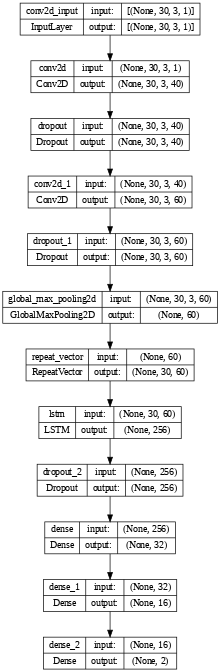

In [ ]:
plot_model(model= model_sensors, show_shapes= True, dpi=50)

In [ ]:
# Calculate prediction time for sensor1
prediction_time_sensors, _ = calculate_prediction_time(model_sensors, X_test_sensors)
print(f'Prediction time for sensors: {prediction_time_sensors} seconds')

85/85 [==============================] - 1s 5ms/step
Prediction time for sensors: 1.8412928581237793 seconds


In [ ]:
#plot history of model_sensor1
history_sensors = pd.read_csv(model_path +"historyLOG_Constant-0_1_dur_10_sensors.csv", index_col='epoch')
history_sensors.reset_index(drop= True, inplace= True)
history_sensors.head()
print('Average Exe_time for sensors: {} sec.'.format(round(np.mean(history_sensors['epoch_time'].values),3)))


Average Exe_time for sensors: 1.921 sec.


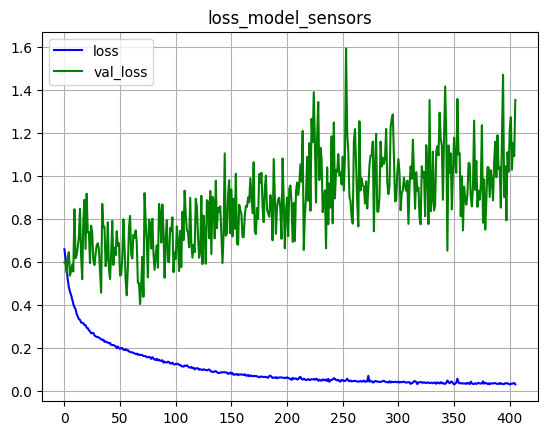

In [ ]:
plt.plot( history_sensors['loss'], 'b',label = 'loss')
plt.plot( history_sensors['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensors')
plt.show()

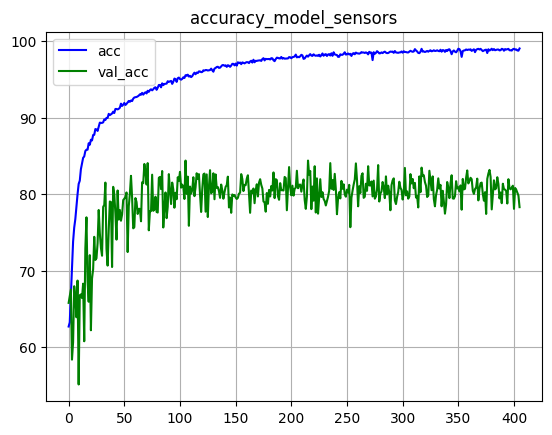

In [ ]:
plt.plot(history_sensors['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensors['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensors')
plt.show()

In [ ]:
#last model_sensor1 evaluation
test_loss, test_acc = model_sensors.evaluate( X_test_sensors, y_test_sensors, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

85/85 [==============================] - 0s 4ms/step - loss: 1.0433 - accuracy: 0.8497
test accuracy :85.0% 
 test loss :1.04


In [ ]:
y_pred_total = model_sensors.predict( X_test_sensors, verbose= 1)

85/85 [==============================] - 0s 3ms/step


In [ ]:
y_pred_total = [np.argmax(i) for i in y_pred_total]
y_pred_total

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
y_test_sensors

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y_test_sensors = [np.argmax(i) for i in y_test_sensors]
y_test_sensors

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
y_pred_total

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_sensors, y_pred_total, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensors, y_pred_total, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensors, y_pred_total, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensors, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 84.97%

precision score: 84.97%

F1 score: 84.97%

accuracy score: 84.97%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_sensors, y_pred_total, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensors, y_pred_total, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensors, y_pred_total, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensors, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 86.09%

precision score: 85.59%

F1 score: 84.95%

accuracy score: 84.97%



In [ ]:
conf = confusion_matrix(y_test_sensors, y_pred_total, labels=[1,0])
conf_df = pd.DataFrame(conf, columns= [1,0], index= [1,0])
conf_df

,1,0
1,1196,341
0,66,1105
